# Getting started with Somnium

In this notebook, a toy dataset is created in order to show how to run the algorithm. The dataset contains synthetic features about 10,000 patient's weight, height, BMI, fat % and an independent random variable. Two maps are generated and plotted: one with hexagonal lattice and another with rectangular lattice.

In [ ]:
%cd ..

In [ ]:
!kaggle datasets download -d giovamata/airlinedelaycauses
!unzip airlinedelaycauses.zip

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus
from somnium.visualization import plot_umatrix

## Dataset creation

In [3]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                    "height": np.random.randn(10000)*8+180})
      .assign(BMI=lambda d: 703*d.weight/(d.height**2),
              fat=lambda d: ((d.weight-75)/8)*2 + 23.5 +
              np.random.randn(10000)*3,
              random=10+np.random.randn(10000)
              ))

data = df.values
names = df.columns
df.head()

,weight,height,BMI,fat,random
0,65.043125,183.147880,1.363179,24.109478,9.671984
1,76.639754,186.013107,1.557121,21.967587,10.501921
2,67.630312,175.064960,1.551309,21.546370,9.885191
3,81.443382,175.480825,1.859310,25.494405,9.971570
4,76.413719,187.425313,1.529221,21.202738,9.190249


## Hexagonal lattice SOM

E_Quantization = 0.33934545102884023
E_Topographic = 0.05289999999999995


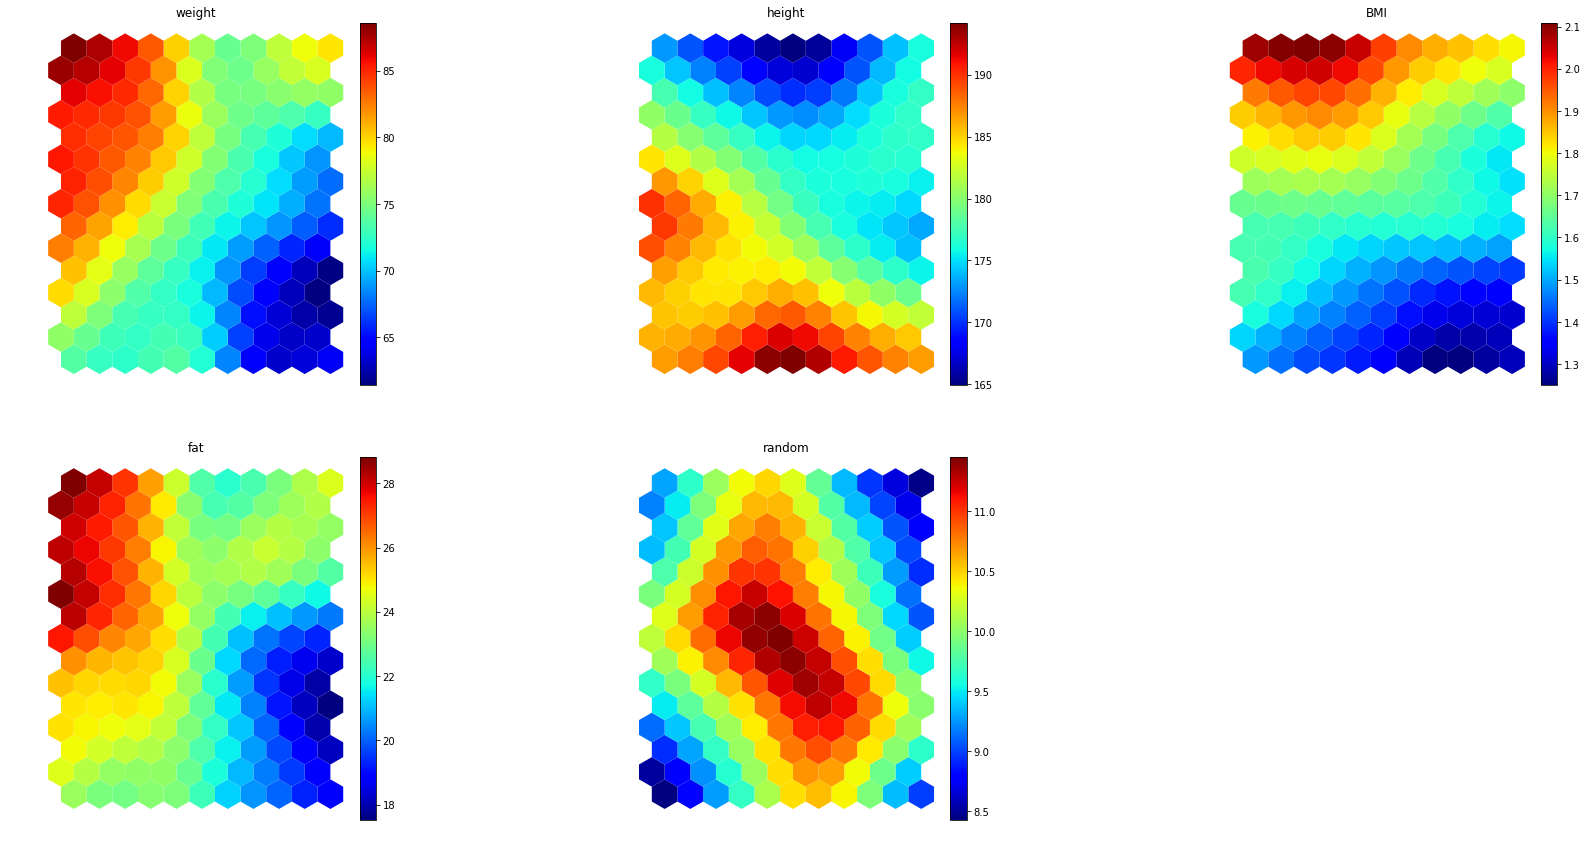

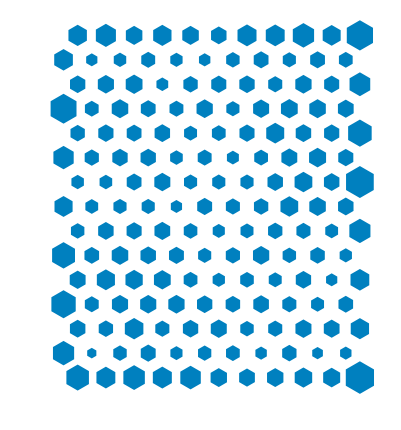

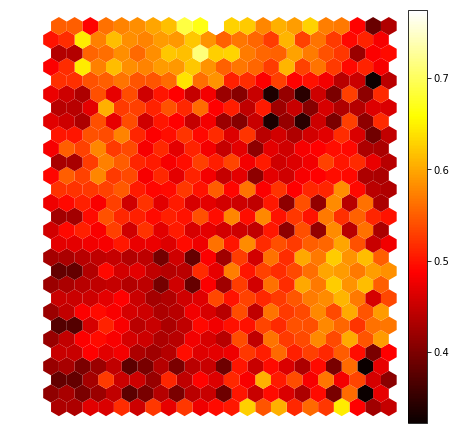

In [4]:
model = SOM(lattice="hexa", normalization="standard", distance_metric="euclidean", neighborhood="gaussian", mapsize=[15, 11], n_jobs=1)

model.fit(data, 30, 20, 5)
model.fit(data, 30, 5, 1)

print("E_Quantization =", model.calculate_quantization_error())
print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

## Rectangular lattice SOM

E_Quantization = 0.3524310135857668
E_Topographic = 0.07889999999999997


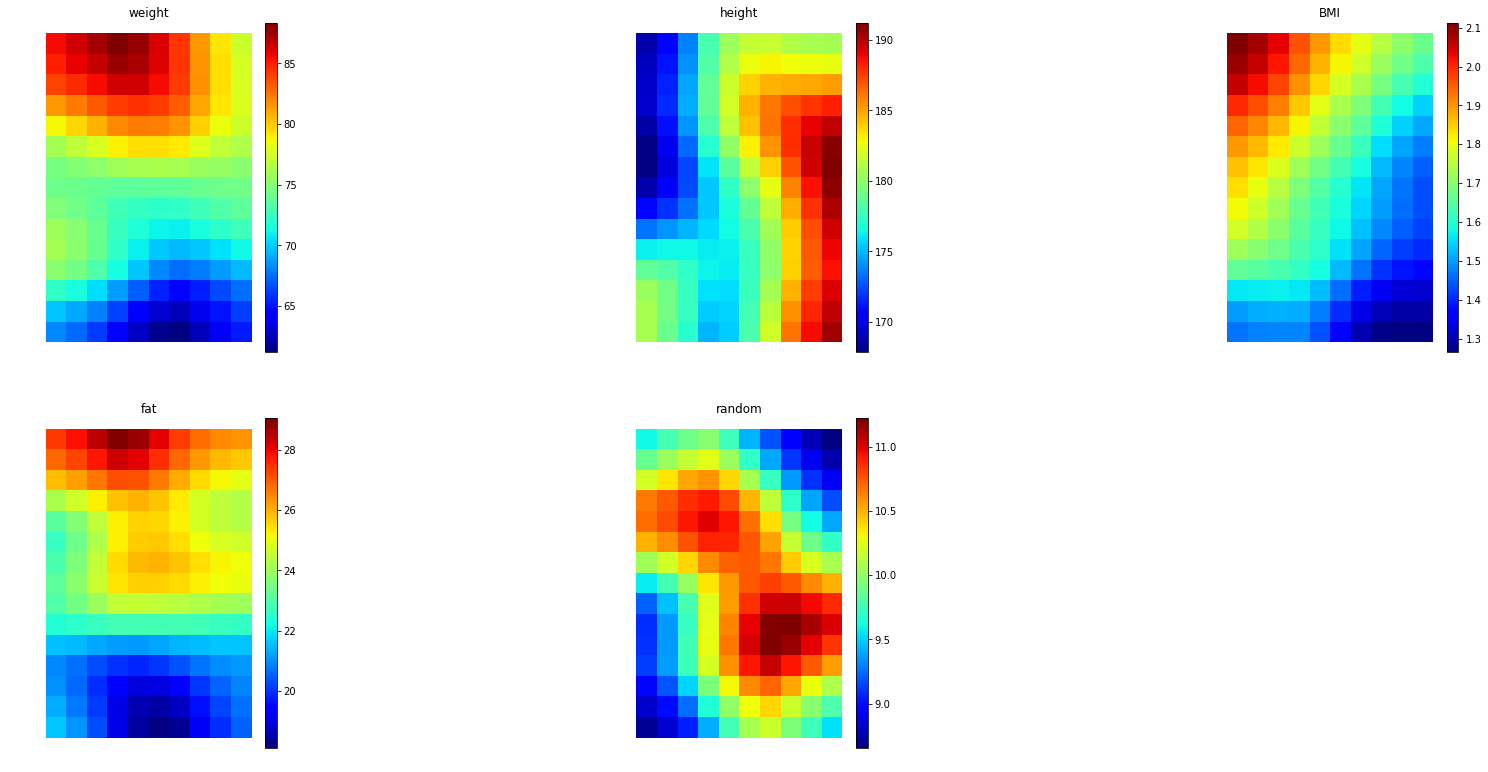

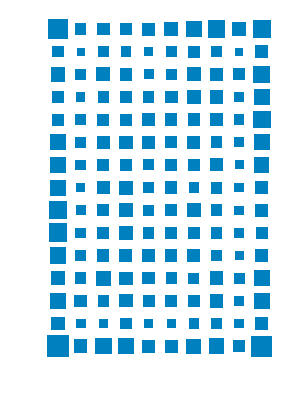

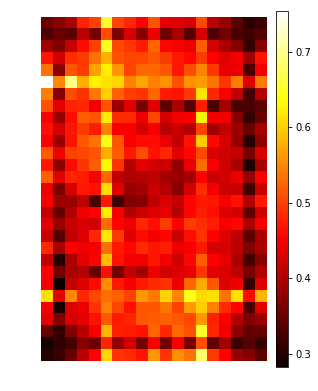

In [5]:
model = SOM(lattice="rect", normalization="standard", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 10])

model.fit(data, 30, 20, 5)
model.fit(data, 30, 5, 3)

print("E_Quantization =", model.calculate_quantization_error())
print("E_Topographic =", model.calculate_topographic_error())

plot_components(model=model, names=names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model=model, colormap = plt.cm.hot, figure_width=10)